In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv('Invistico_Airline.csv')

In [3]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
# Data Cleaning
def clean_dataset(df):
    # Check for missing values
    print("Missing Values:")
    print(df.isnull().sum())

In [6]:
# Remove any rows with missing values if necessary
df_cleaned = df.dropna()

In [8]:
# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

In [13]:
def clean_dataset(df):
    # Remove any rows with missing values if necessary
    df_cleaned = df.dropna()
    
    # Data type conversions if needed
    numeric_columns = [
        'Seat comfort', 'Food and drink', 'Inflight wifi service', 
        'Inflight entertainment', 'Online support', 'Ease of Online booking',
        'On-board service', 'Leg room service', 'Baggage handling', 
        'Checkin service', 'Cleanliness', 'Online boarding',
        'Departure Delay in Minutes', 'Arrival Delay in Minutes'
    ]
    
    for col in numeric_columns:
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
    
    return df_cleaned

In [14]:
# Perform statistical analysis
def analyze_survey_data(df):
    # Overall satisfaction analysis
    satisfaction_stats = {
        'Mean Satisfaction': df['satisfaction'].value_counts(normalize=True),
        'Satisfaction by Gender': df.groupby('Gender')['satisfaction'].value_counts(normalize=True),
        'Satisfaction by Customer Type': df.groupby('Customer Type')['satisfaction'].value_counts(normalize=True)
    }

In [16]:
# Service rating analysis
service_columns = [
    'Seat comfort', 'Food and drink', 'Inflight wifi service', 
    'Inflight entertainment', 'Online support', 'Ease of Online booking',
    'On-board service', 'Leg room service', 'Baggage handling', 
    'Checkin service', 'Cleanliness', 'Online boarding'
]
    
service_ratings = df[service_columns].agg(['mean', 'median', 'std'])

In [18]:
def analyze_survey_data(df):
    # Prepare columns for correlation
    service_columns = [
        'Seat comfort', 'Food and drink', 'Inflight wifi service', 
        'Inflight entertainment', 'Online support', 'Ease of Online booking',
        'On-board service', 'Leg room service', 'Baggage handling', 
        'Checkin service', 'Cleanliness', 'Online boarding'
    ]
    
    # Convert satisfaction to numeric
    df['satisfaction_numeric'] = (df['satisfaction'] == 'satisfied').astype(int)
    
    # Correlation analysis
    correlation_matrix = df[service_columns + ['satisfaction_numeric']].corr()
    
    # Satisfaction stats
    satisfaction_stats = {
        'Mean Satisfaction': df['satisfaction'].value_counts(normalize=True),
        'Satisfaction by Gender': df.groupby('Gender')['satisfaction'].value_counts(normalize=True),
        'Satisfaction by Customer Type': df.groupby('Customer Type')['satisfaction'].value_counts(normalize=True)
    }
    
    # Service ratings
    service_ratings = df[service_columns].agg(['mean', 'median', 'std'])
    
    return satisfaction_stats, service_ratings, correlation_matrix

In [19]:
 # Create visualizations
def create_visualizations(df):
    plt.figure(figsize=(15, 10))   

Text(0.5, 1.0, 'Satisfaction Distribution')

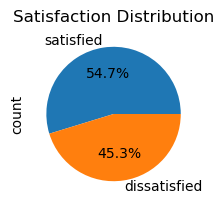

In [20]:
# 1. Satisfaction Distribution
plt.subplot(2, 2, 1)
df['satisfaction'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Satisfaction Distribution')


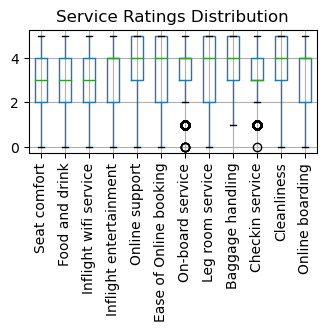

In [21]:
# 2. Service Ratings Boxplot
plt.subplot(2, 2, 2)
service_columns = [
    'Seat comfort', 'Food and drink', 'Inflight wifi service', 
    'Inflight entertainment', 'Online support', 'Ease of Online booking',
    'On-board service', 'Leg room service', 'Baggage handling', 
    'Checkin service', 'Cleanliness', 'Online boarding'
]
df[service_columns].boxplot(rot=90)
plt.title('Service Ratings Distribution')
plt.tight_layout()


Text(0.5, 1.0, 'Satisfaction by Customer Type')

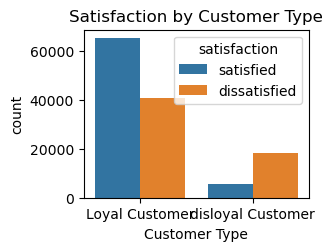

In [22]:
# 3. Satisfaction by Customer Type
plt.subplot(2, 2, 3)
sns.countplot(x='Customer Type', hue='satisfaction', data=df)
plt.title('Satisfaction by Customer Type')

In [26]:
# Create a numeric version of satisfaction
df['satisfaction_numeric'] = (df['satisfaction'] == 'satisfied').astype(int)

# Modify service columns to include satisfaction_numeric
correlation_columns = service_columns + ['satisfaction_numeric']

# Create correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, 
            xticklabels=correlation_columns, 
            yticklabels=correlation_columns)
plt.title('Service Ratings Correlation')
plt.tight_layout()
plt.savefig('survey_analysis_visualizations.png')
plt.close()

In [28]:
# Clean the dataset
def clean_dataset(df):
    # Create a deep copy to avoid warnings
    df_cleaned = df.copy()
    
    # Remove any rows with missing values if necessary
    df_cleaned = df_cleaned.dropna()
    
    # Data type conversions if needed
    numeric_columns = [
        'Seat comfort', 'Food and drink', 'Inflight wifi service', 
        'Inflight entertainment', 'Online support', 'Ease of Online booking',
        'On-board service', 'Leg room service', 'Baggage handling', 
        'Checkin service', 'Cleanliness', 'Online boarding',
        'Departure Delay in Minutes', 'Arrival Delay in Minutes'
    ]
    
    # Use .loc to avoid warnings
    for col in numeric_columns:
        df_cleaned.loc[:, col] = pd.to_numeric(df_cleaned[col], errors='coerce')
    
    return df_cleaned

# Modify the visualization function similarly
def create_visualizations(df):
    # Create a copy to avoid warnings
    df_local = df.copy()
    
    # Create satisfaction numeric column using .loc
    df_local.loc[:, 'satisfaction_numeric'] = (df_local['satisfaction'] == 'satisfied').astype(int)
    
    # Rest of the visualization code remains the same
    plt.figure(figsize=(15, 10))
    
    # ... (rest of the visualization code)

In [31]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
